In [2]:
SAMPLE_YEAR = {
    "CHRF_BD0003": 2018,
    "CHRF_RNA_0012": 2017,
    "CHRF_RNA_0015": 2017,
    "CSF_0003": 2021,
    "CSF_0004": 2021,
    "CSF_0015": 2022,
    "CSF_0016": 2022,
    "CSF_0017": 2022,
    "CSF_0018": 2020,
    "CSF_0019": 2020,
    "CSF_0020": 2022,
    "CSF_0022": 2021,
    "CSF_0023": 2021,
    "CSF_0024": 2020,
    "CSF_0026": 2020,
    "CSF_0027": 2020,
    "CSF_0028": 2020,
    "CSF_0036": 2019,
    "CSF_0037": 2019,
    "CSF_0038": 2018,
    "CSF_0039": 2018,
    "CSF_0040": 2020,
    "CSF_0041": 2021,
    "CSF_0042": 2021,
    "CSF_0043": 2022,
    "CSF_0044": 2022,
    "CSF_0045": 2021,
    "CSF_0046": 2021,
    "CSF_0047": 2021,
    "CSF_0048": 2021,
    "CSF_0049": 2020,
    "CSF_0050": 2021,
    "CSF_0051": 2020,
    "CSF_0052": 2020,
    "CSF_0053": 2020,
    "CSF_0054": 2020,
    "CSF_0055": 2019,
    "CSF_0056": 2019,
    "CSF_0057": 2019,
    "CSF_0058": 2019,
    "CSF_0059": 2019,
    "CSF_0060": 2018,
    "CSF_0061": 2018,
    "CSF_0062": 2018,
    "CSF_0063": 2018,
    "CSF_0064": 2017,
    "CSF_0065": 2017,
    "CSF_0066": 2022,
    "CSF_0067": 2017,
    "CSF_0068": 2017,
    "CSF_0069": 2017,
    "CSF_0070": 2017,
    "CSF_0071": 2018,
    "CSF_0072": 2022,
    "CSF_0073": 2022,
    "CSF_0074": 2018,
    "CSF_0075": 2019,
    "CSF_0076": 2019,
    "CSF_0077": 2019,
    "CSF_0090": 2015,
    "CSF_0091": 2015,
    "CSF_0092": 2015,
    "CSF_0093": 2015,
    "CSF_0094": 2015,
    "CSF_0095": 2016,
    "CSF_0096": 2016,
    "CSF_0097": 2016,
    "CSF_0098": 2016,
    "CSF_0099": 2016,
    "CSF_0100": 2016,
    "CSF_0101": 2016,
}



[CHECK] ORF2_LEN_AA = 914
[CHECK] VP2_ORF2_AA_START, VP2_LEN_DATA = 363 552
[CHECK] VP1_END_NT_DATA, VP2_START_NT_DATA, VP2_END_NT_DATA = 5037 3382 5037
Common samples used (without ref): 59

⚠️ NS1: only one target present → CHRF_RNA_0015

=== NS1: strict SINGLE-target exclusive mutations ===
position(51): L > F
position(131): T > V
position(204): Q > P
position(206): Q > R
position(207): A > T
position(291): T > A
position(292): F > Y

⚠️ ORF2: only one target present → CHRF_RNA_0015

=== ORF2: strict SINGLE-target exclusive mutations ===
position(62): K > R
position(69): A > P
position(134): T > S
position(143): A > S
position(150): I > V
position(173): K > Q
position(191): N > H
position(256): E > K
position(286): T > S
position(353): T > A
position(356): V > L
position(359): D > N
Here I have print VR-II
position(475): A > S (VR-II)
Here I have print VR-II
position(476): T > S (VR-II)

ALL VR REGIONS (VP2-based) from reference: CSF_0090
VP2 starts at ORF2 aa position: 363
VP2 leng

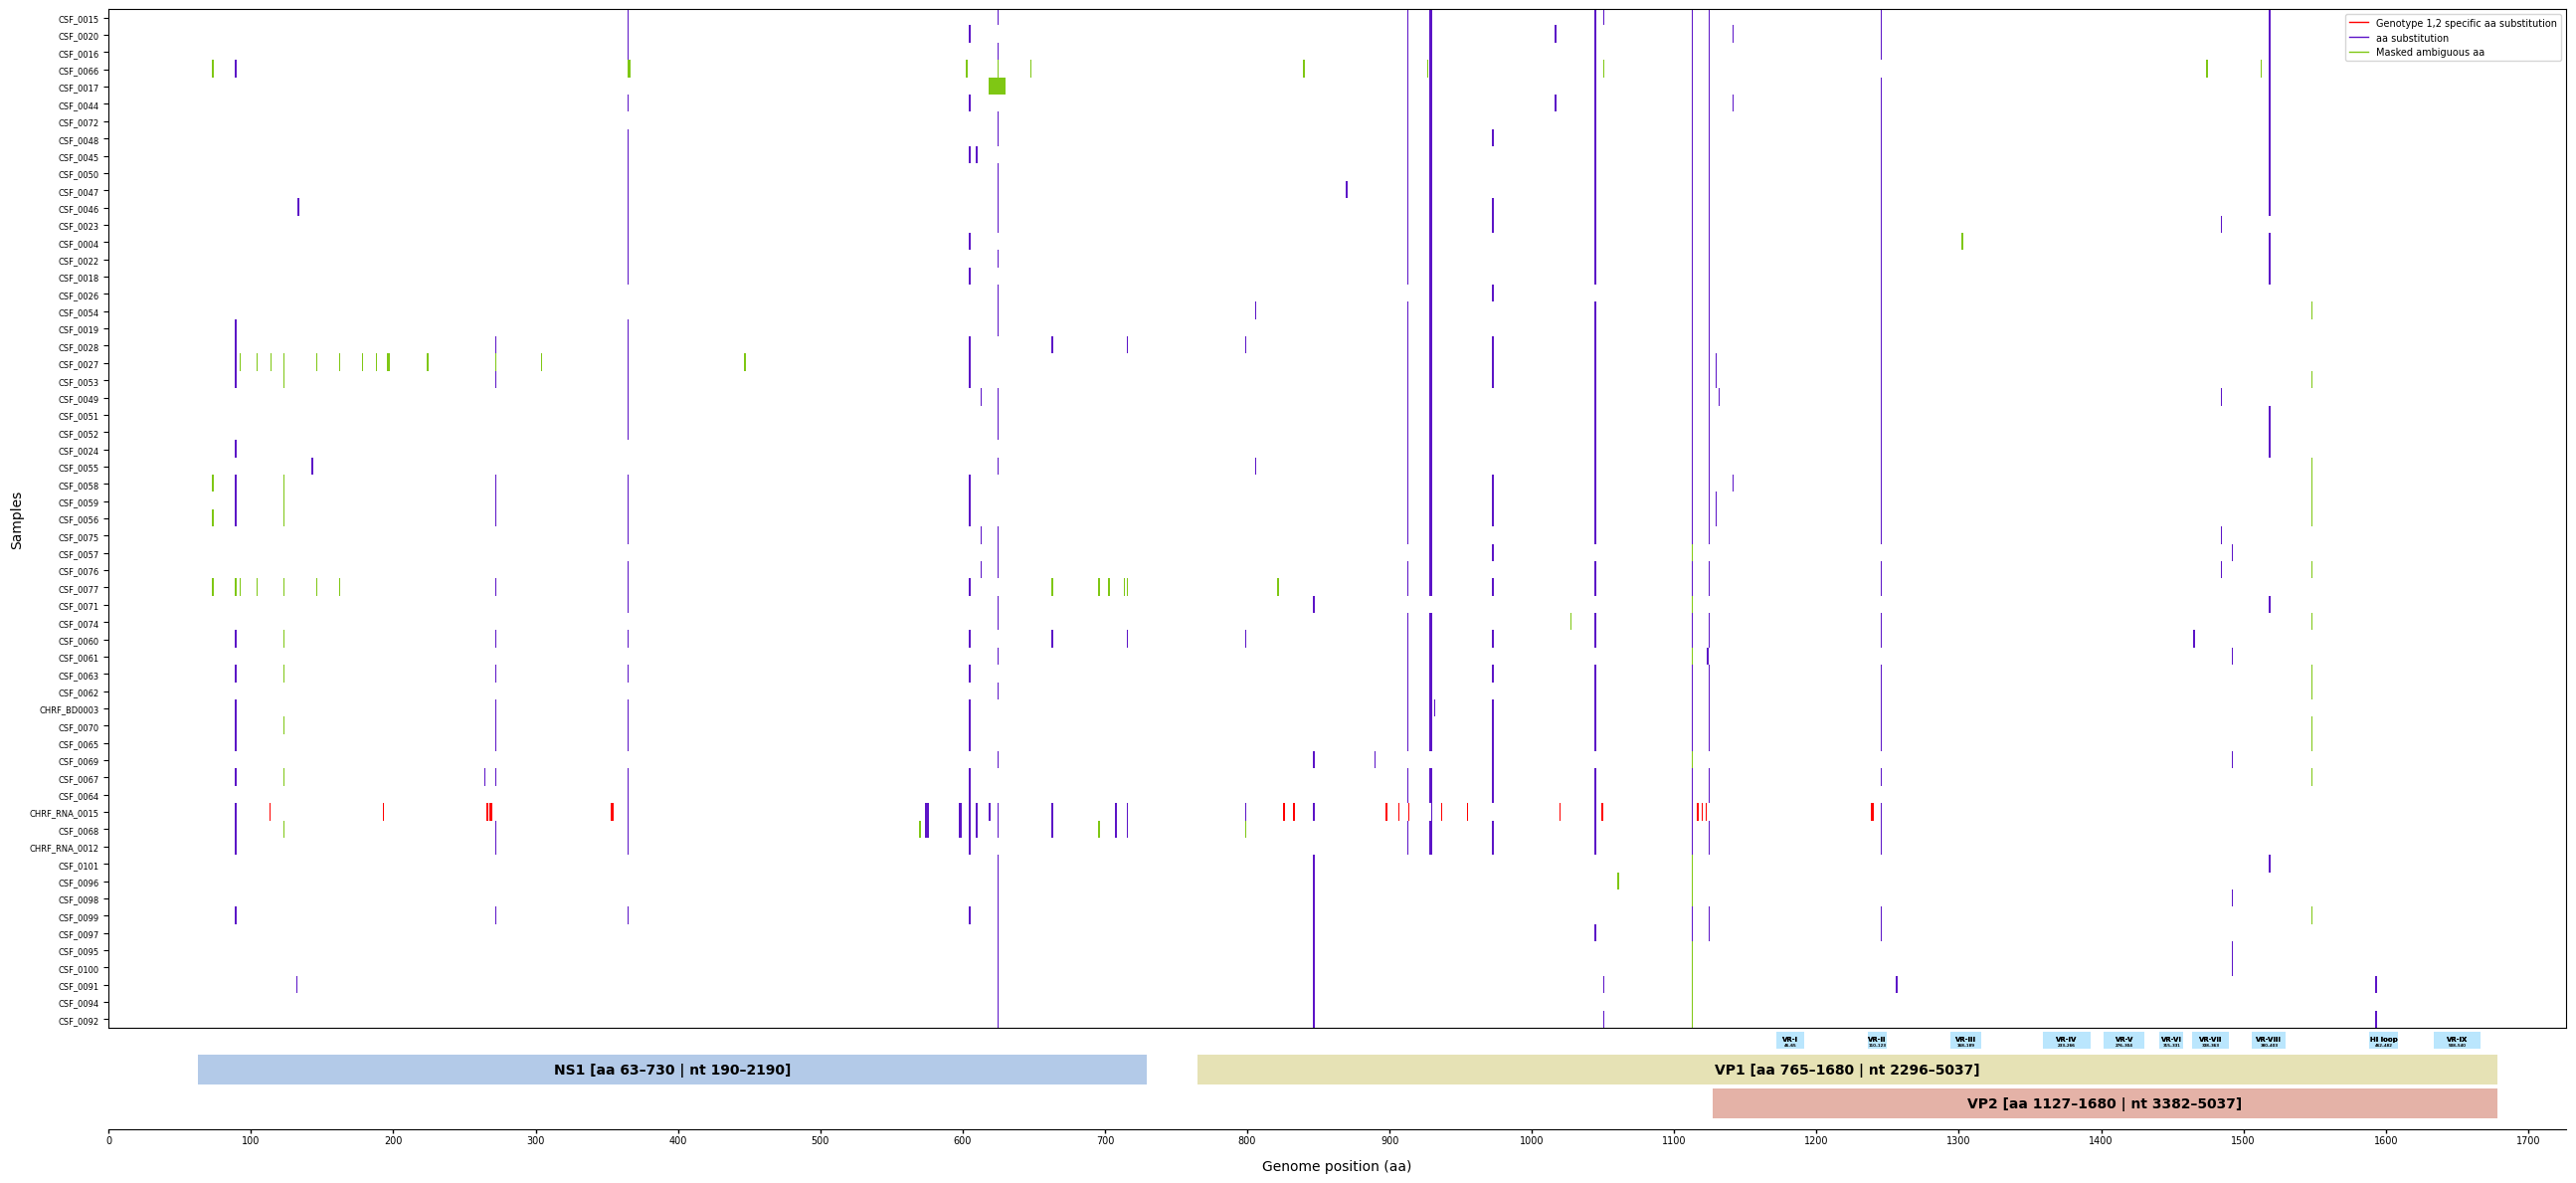

In [23]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import ListedColormap, BoundaryNorm
import re

###############################################################################
# USER SETTINGS
###############################################################################

ORF1_FILE = "/home/preonath/Desktop/CHRF_Project/PRV4/PARV4_Analysis_Personal/Analysis_08_12_25/Input_Data/Results/ORF_1_oneline.faa"
ORF2_FILE = "/home/preonath/Desktop/CHRF_Project/PRV4/PARV4_Analysis_Personal/Analysis_08_12_25/Input_Data/Results/ORF_2_oneline.faa"

REFERENCE_SAMPLE = "CSF_0090"
TARGET_SAMPLES   = ["CSF_0093", "CHRF_RNA_0015"]

NS1_START_NT = 190
NS1_END_NT   = 2190
VP1_START_NT = 2296
VP1_END_NT   = 5037
VP2_START_NT = 3382
VP2_END_NT   = 5037

GENOME_START = 1
GENOME_END   = 5181






NS1_AA_LEN = (NS1_END_NT - NS1_START_NT + 1) // 3
VP1_AA_LEN = (VP1_END_NT - VP1_START_NT + 1) // 3
VP2_AA_LEN = (VP2_END_NT - VP2_START_NT + 1) // 3
def aa_length_from_nt(start_nt, end_nt):
    length_nt = end_nt - start_nt + 1
    if length_nt % 3 != 0:
        raise ValueError(
            f"NT range {start_nt}-{end_nt} is not divisible by 3 "
            f"(length = {length_nt})"
        )
    return length_nt // 3


NS1_AA_LEN = aa_length_from_nt(NS1_START_NT, NS1_END_NT)
VP1_AA_LEN = aa_length_from_nt(VP1_START_NT, VP1_END_NT)
VP2_AA_LEN = aa_length_from_nt(VP2_START_NT, VP2_END_NT)


OUT_PNG = "GroupExclusive_mutations_single_genome.pdf"

###############################################################################
# VR REGIONS (TREAT AS ORF2/VP1 amino-acid coordinates, as you requested)
###############################################################################
# ("VR-I", 46, 65) means ORF2 aa 46–65 (NO OFFSET, NO REMAP)
VR_REGIONS_AA = [
    ("VR-I",    46,  65),
    ("VR-II",  110, 123),
    ("VR-III", 168, 189),
    ("VR-IV",  233, 266),
    ("VR-V",   276, 304),
    ("VR-VI",  315, 331),
    ("VR-VII", 338, 363),
    ("VR-VIII",380, 403),
    ("HI loop",462, 482),
    ("VR-IX",  508, 540),
]

def vr_name_from_orf2_aa(orf2_aa_1based: int):
    for name, a1, a2 in VR_REGIONS_AA:
        if a1 <= orf2_aa_1based <= a2:
            print("Here I have print", name)
            return name
    return None


# Previously has been used at the VP1; so started by orf1. As orf1=VP1

# def orf2_aa_range_to_genome_nt(a1: int, a2: int):
#     """
#     ORF2 aa (1-based) -> genome nt span using VP1_START_NT as ORF2 start.
#     """
#     nt_start = VP1_START_NT + (a1 - 1) * 3
#     nt_end   = VP1_START_NT + (a2 * 3) - 1  # inclusive
#     return nt_start, nt_end


def vp2_aa_range_to_genome_nt(a1: int, a2: int):
    """
    VP2 aa (1-based) -> genome nt span using VP2_START_NT as origin.
    VR-I to VR-IX are defined on VP2.
    """
    nt_start = VP2_START_NT + (a1 - 1) * 3
    nt_end   = VP2_START_NT + (a2 * 3) - 1  # inclusive
    return nt_start, nt_end




###############################################################################
# HELPERS
###############################################################################

def normalize_sample_id(header):
    h = header.split()[0]
    h = h.split("|")[0]
    return re.sub(r"_000\d+$", "", h)

def load_sequences(fasta_file):
    return {normalize_sample_id(r.id): str(r.seq) for r in SeqIO.parse(fasta_file, "fasta")}

# =============================================================================
# DERIVED ORF2/VP2 CONSTANTS (DEFINE ONCE, USE EVERYWHERE)
# =============================================================================
seqs_orf2 = load_sequences(ORF2_FILE)
if REFERENCE_SAMPLE not in seqs_orf2:
    raise ValueError(f"REFERENCE_SAMPLE {REFERENCE_SAMPLE} not found in {ORF2_FILE}")

ref_orf2 = seqs_orf2[REFERENCE_SAMPLE]
ORF2_LEN_AA = len(ref_orf2)  # expected ~914

# VP2 start inside ORF2 (AA coords)
VP2_ORF2_AA_START = ((VP2_START_NT - VP1_START_NT) // 3) + 1  # expected 380 (if coords consistent)
VP2_ORF2_AA_END   = ORF2_LEN_AA                               # VP2 runs to ORF2 end in your data
VP2_LEN_DATA      = VP2_ORF2_AA_END - VP2_ORF2_AA_START + 1    # expected 535

# Optional (but recommended): compute consistent NT ends from AA length
# This is exactly why you were seeing 5040/919 weirdness.
VP1_END_NT_DATA = VP1_START_NT + ORF2_LEN_AA * 3 - 1           # should be 5037 if ORF2_LEN_AA=914
VP2_START_NT_DATA = VP1_START_NT + (VP2_ORF2_AA_START - 1) * 3 # should match 3433
VP2_END_NT_DATA = VP1_END_NT_DATA

print("[CHECK] ORF2_LEN_AA =", ORF2_LEN_AA)
print("[CHECK] VP2_ORF2_AA_START, VP2_LEN_DATA =", VP2_ORF2_AA_START, VP2_LEN_DATA)
print("[CHECK] VP1_END_NT_DATA, VP2_START_NT_DATA, VP2_END_NT_DATA =", VP1_END_NT_DATA, VP2_START_NT_DATA, VP2_END_NT_DATA)

def find_reference_id(fasta_file, base_id):
    for rec in SeqIO.parse(fasta_file, "fasta"):
        if normalize_sample_id(rec.id) == base_id:
            return rec.id
    raise ValueError(f"Reference {base_id} not found in {fasta_file}")

def build_mutation_matrix(fasta_file, reference_id):
    records = list(SeqIO.parse(fasta_file, "fasta"))
    ref_seq = next(str(r.seq) for r in records if r.id == reference_id)

    L = len(ref_seq)
    mtx, samples = [], []
    for r in records:
        seq = str(r.seq)
        row = np.zeros(L, dtype=int)
        for i in range(min(len(seq), L)):
            if ref_seq[i] != "-" and seq[i] != "-" and seq[i] != ref_seq[i]:
                row[i] = 1
        mtx.append(row)
        samples.append(normalize_sample_id(r.id))

    return np.array(mtx), samples

###############################################################################
# STRICT PAIR-EXCLUSIVE RED LOGIC
###############################################################################

def strict_pair_position_exclusive_matrix_and_print(
    fasta_file, mtx, plot_samples, reference_sample, target_samples, label
):
    seqs = load_sequences(fasta_file)
    ref = reference_sample
    t1, t2 = target_samples

    if ref not in seqs:
        raise ValueError(f"{label}: reference {ref} not found in {fasta_file}")
    if t1 not in seqs or t2 not in seqs:
        raise ValueError(f"{label}: targets {t1}/{t2} not found in {fasta_file}")

    ref_seq = seqs[ref]
    out = np.zeros_like(mtx)

    idx1 = plot_samples.index(t1)
    idx2 = plot_samples.index(t2)

    print(f"\n=== {label}: strict POSITION-exclusive mutations ===")

    found = False

    for aa in range(len(ref_seq)):
        if aa >= len(seqs[t1]) or aa >= len(seqs[t2]):
            continue

        r  = ref_seq[aa]
        a1 = seqs[t1][aa]
        a2 = seqs[t2][aa]

        if "-" in (r, a1, a2):
            continue
        if a1 == r or a2 == r:
            continue
        if a1 != a2:
            continue

        exclusive = True
        for s in plot_samples:
            if s in (t1, t2):
                continue
            if s not in seqs:
                continue
            if aa >= len(seqs[s]):
                continue
            if seqs[s][aa] != r:
                exclusive = False
                break

        if exclusive:
            out[idx1, aa] = 1
            out[idx2, aa] = 1
        
            tag = ""
            if label == "ORF2":
                vp2_aa_start = ((VP2_START_NT - VP1_START_NT) // 3) + 1
        
                # Only compute VP2 position if AA is inside VP2
                if (aa + 1) >= vp2_aa_start:
                    vp2_pos = (aa + 1) - vp2_aa_start + 1
                    vr = vr_name_from_orf2_aa(vp2_pos)
        
                    if vr:
                        tag = f" ({vr})"
        
            print(f"position({aa+1}): {r} > {a1}{tag}")
            found = True


    if not found:
        print("No strict exclusive positions found.")

    return out

def strict_single_position_exclusive_matrix_and_print(
    fasta_file, mtx, plot_samples, reference_sample, target_sample, label
):
    seqs = load_sequences(fasta_file)
    ref = reference_sample
    t = target_sample

    if ref not in seqs:
        raise ValueError(f"{label}: reference {ref} not found in {fasta_file}")
    if t not in seqs:
        raise ValueError(f"{label}: target {t} not found in {fasta_file}")

    ref_seq = seqs[ref]
    out = np.zeros_like(mtx)
    idx = plot_samples.index(t)

    print(f"\n=== {label}: strict SINGLE-target exclusive mutations ===")

    found = False

    for aa in range(len(ref_seq)):
        if aa >= len(seqs[t]):
            continue

        r = ref_seq[aa]
        a = seqs[t][aa]

        if "-" in (r, a):
            continue
        if a == r:
            continue

        exclusive = True
        for s in plot_samples:
            if s == t:
                continue
            if s not in seqs:
                continue
            if aa >= len(seqs[s]):
                continue
            if seqs[s][aa] != r:
                exclusive = False
                break

        if exclusive:
            out[idx, aa] = 1

            tag = ""
            if label == "ORF2":
                vp2_aa_start = ((VP2_START_NT - VP1_START_NT) // 3) + 1

                # VR logic applies only within VP2
                if (aa + 1) >= vp2_aa_start:
                    vp2_pos = (aa + 1) - vp2_aa_start + 1
                    vr = vr_name_from_orf2_aa(vp2_pos)

                    if vr:
                        tag = f" ({vr})"

            print(f"position({aa+1}): {r} > {a}{tag}")
            found = True

    if not found:
        print("No strict single-target exclusive positions found.")

    return out


###############################################################################
# MAP ORF → GENOME
###############################################################################

def expand_to_genome(mtx, orf_start_nt):
    genome_len = (GENOME_END // 3) + 1
    genome = np.zeros((mtx.shape[0], genome_len), dtype=int)
    start = orf_start_nt // 3
    genome[:, start:start + mtx.shape[1]] = mtx
    return genome

###############################################################################
# MAIN PIPELINE
###############################################################################

ref1 = find_reference_id(ORF1_FILE, REFERENCE_SAMPLE)
mtx_ns1, samples_ns1 = build_mutation_matrix(ORF1_FILE, ref1)

ref2 = find_reference_id(ORF2_FILE, REFERENCE_SAMPLE)
mtx_vp1, samples_vp1 = build_mutation_matrix(ORF2_FILE, ref2)

# common samples excluding reference
common_samples = sorted(
    (set(samples_ns1) & set(samples_vp1)) - {REFERENCE_SAMPLE},
    key=lambda s: SAMPLE_YEAR.get(s, 9999)
)

print(f"Common samples used (without ref): {len(common_samples)}")

idx_ns1 = {s: i for i, s in enumerate(samples_ns1)}
idx_vp1 = {s: i for i, s in enumerate(samples_vp1)}

mtx_ns1 = mtx_ns1[[idx_ns1[s] for s in common_samples], :]
mtx_vp1 = mtx_vp1[[idx_vp1[s] for s in common_samples], :]

def get_valid_targets(seqs, targets, plot_samples):
    return [t for t in targets if t in seqs and t in plot_samples]

###############################################################################
# RED & BLUE MATRICES
###############################################################################

# NS1
seqs_ns1 = load_sequences(ORF1_FILE)
valid_targets_ns1 = get_valid_targets(seqs_ns1, TARGET_SAMPLES, common_samples)

if len(valid_targets_ns1) == 2:
    red_ns1 = strict_pair_position_exclusive_matrix_and_print(
        ORF1_FILE, mtx_ns1, common_samples,
        REFERENCE_SAMPLE, valid_targets_ns1, "NS1"
    )
elif len(valid_targets_ns1) == 1:
    print(f"\n⚠️ NS1: only one target present → {valid_targets_ns1[0]}")
    red_ns1 = strict_single_position_exclusive_matrix_and_print(
        ORF1_FILE, mtx_ns1, common_samples,
        REFERENCE_SAMPLE, valid_targets_ns1[0], "NS1"
    )
else:
    print("\n⚠️ NS1: no targets present → skipping red logic")
    red_ns1 = np.zeros_like(mtx_ns1)

# ORF2
seqs_orf2 = load_sequences(ORF2_FILE)
valid_targets_orf2 = get_valid_targets(seqs_orf2, TARGET_SAMPLES, common_samples)

if len(valid_targets_orf2) == 2:
    red_orf2 = strict_pair_position_exclusive_matrix_and_print(
        ORF2_FILE, mtx_vp1, common_samples,
        REFERENCE_SAMPLE, valid_targets_orf2, "ORF2"
    )
elif len(valid_targets_orf2) == 1:
    print(f"\n⚠️ ORF2: only one target present → {valid_targets_orf2[0]}")
    red_orf2 = strict_single_position_exclusive_matrix_and_print(
        ORF2_FILE, mtx_vp1, common_samples,
        REFERENCE_SAMPLE, valid_targets_orf2[0], "ORF2"
    )
else:
    print("\n⚠️ ORF2: no targets present → skipping red logic")
    red_orf2 = np.zeros_like(mtx_vp1)

# blue matrices (all mutations minus red)
blue_ns1 = (mtx_ns1 > 0).astype(int)
blue_orf2 = (mtx_vp1 > 0).astype(int)
blue_ns1[red_ns1 == 1] = 0
blue_orf2[red_orf2 == 1] = 0


def mask_genome_positions_with_X(
    genome_all,
    orf1_fasta,
    orf2_fasta,
    common_samples,
    NS1_START_NT,
    VP1_START_NT,
    GENOME_END
):
    """
    If ORF1 or ORF2 has 'X' at a position for a sample,
    force genome_all[row, col] = 0 (neutral / grey).
    """

    # Load sequences
    seqs_orf1 = load_sequences(orf1_fasta)
    seqs_orf2 = load_sequences(orf2_fasta)

    genome_len = (GENOME_END // 3) + 1

    for row_idx, sample in enumerate(common_samples):

        # --- ORF1 masking ---
        if sample in seqs_orf1:
            seq1 = seqs_orf1[sample]
            for aa_idx, aa in enumerate(seq1):
                if aa == "X":
                    gpos = (NS1_START_NT // 3) + aa_idx
                    if 0 <= gpos < genome_len:
                        genome_all[row_idx, gpos] = 3

        # --- ORF2 masking ---
        if sample in seqs_orf2:
            seq2 = seqs_orf2[sample]
            for aa_idx, aa in enumerate(seq2):
                if aa == "X":
                    gpos = (VP1_START_NT // 3) + aa_idx
                    if 0 <= gpos < genome_len:
                        genome_all[row_idx, gpos] = 3

    return genome_all





###############################################################################
# GENOME GRID
###############################################################################

genome_red  = expand_to_genome(red_ns1,  NS1_START_NT) + expand_to_genome(red_orf2,  VP1_START_NT)
genome_blue = expand_to_genome(blue_ns1, NS1_START_NT) + expand_to_genome(blue_orf2, VP1_START_NT)

genome_all = np.zeros_like(genome_red)
genome_all[genome_blue > 0] = 1
genome_all[genome_red  > 0] = 2


genome_all = mask_genome_positions_with_X(
    genome_all,
    ORF1_FILE,
    ORF2_FILE,
    common_samples,
    NS1_START_NT,
    VP1_START_NT,
    GENOME_END
)





###############################################################################
# GENOME NT → AA (GENOME-WIDE, DISPLAY ONLY)
###############################################################################

def genome_nt_to_aa_number(nt_pos):
    """
    Convert genome nucleotide position → genome-wide amino-acid index.
    No protein resets. This matches genome-AA coordinates.
    """
    return (nt_pos) // 3

# Genome-wide AA ranges (1-based display)
NS1_AA_START = genome_nt_to_aa_number(NS1_START_NT)
NS1_AA_END   = genome_nt_to_aa_number(NS1_END_NT)

VP1_AA_START = genome_nt_to_aa_number(VP1_START_NT)
VP1_AA_END   = genome_nt_to_aa_number(VP1_END_NT) +1

VP2_AA_START = genome_nt_to_aa_number(VP2_START_NT)
VP2_AA_END   = genome_nt_to_aa_number(VP2_END_NT) +1


###############################################################################
# PLOT (KEEP YOUR ORIGINAL COLORS: blue + red, and NS1/VP1/VP2 colors)
###############################################################################

fig, ax = plt.subplots(figsize=(26, 12))

# KEEP ORIGINAL HEATMAP COLORS
cmap = ListedColormap([
    "white",        # 0: no mutation
    "#5C14C7",      # 1: blue
    "red",          # 2: red
    "#7FC714"       # 3: masked X (gray)
])
norm = BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)



ax.imshow(
    genome_all,
    aspect="auto",
    origin="lower",
    extent=[GENOME_START, GENOME_END, 0, len(common_samples)],
    cmap=cmap,
    norm=norm,
    interpolation="nearest"
)

ax.set_yticks(np.arange(len(common_samples)) + 0.5)
ax.set_yticklabels(common_samples, fontsize=6)

ax.set_xticks([])
ax.set_xlabel("Genome position (aa)", labelpad=95)
ax.set_ylabel("Samples")

###############################################################################
# ORF ANNOTATION PANEL + VR BLOCKS (SAME PANEL, SAME STYLE AS NS1/VP1/VP2)
###############################################################################

# One panel containing: NS1/VP1/VP2 + VR rectangles UNDER them
ax_anno = ax.inset_axes([0, -0.14, 1, 0.16])
ax_anno.set_xlim(GENOME_START, GENOME_END)
ax_anno.set_ylim(0, 1)
ax_anno.axis("off")

# keep your original colors
NS1_COLOR = "#6996d3"
VP1_COLOR = "#cfc66d"
VP2_COLOR = "#cb6751"

# NS1 bar (top row)
ax_anno.add_patch(Rectangle((NS1_START_NT, 0.53), NS1_END_NT-NS1_START_NT, 0.18, facecolor=NS1_COLOR, alpha=0.5))
# ax_anno.text((NS1_START_NT+NS1_END_NT)/2, 0.62, f"NS1 [{NS1_START_NT}–{NS1_END_NT}]", ha="center", va="center", fontsize=10, fontweight="bold")
# NS1 label
ax_anno.text((NS1_START_NT + NS1_END_NT) / 2, 0.62, f"NS1 [aa {NS1_AA_START}–{NS1_AA_END} | nt {NS1_START_NT}–{NS1_END_NT}]", ha="center", va="center", fontsize=10, fontweight="bold")


# VP1 bar (top row)
ax_anno.add_patch(Rectangle((VP1_START_NT, 0.53), VP1_END_NT-VP1_START_NT, 0.18, facecolor=VP1_COLOR, alpha=0.5))
# ax_anno.text((VP1_START_NT+VP1_END_NT)/2, 0.62, f"VP1 [{VP1_START_NT}–{VP1_END_NT}]", ha="center", va="center", fontsize=10, fontweight="bold")
ax_anno.text((VP1_START_NT + VP1_END_NT) / 2,0.62,f"VP1 [aa {VP1_AA_START}–{VP1_AA_END} | nt {VP1_START_NT}–{VP1_END_NT}]",ha="center", va="center", fontsize=10, fontweight="bold")


# VP2 bar (middle row, exactly like your original)
ax_anno.add_patch(Rectangle((VP2_START_NT, 0.32), VP2_END_NT-VP2_START_NT, 0.18, facecolor=VP2_COLOR, alpha=0.5))
# ax_anno.text((VP2_START_NT+VP2_END_NT)/2, 0.41, f"VP2 [{VP2_START_NT}–{VP2_END_NT}]", ha="center", va="center", fontsize=10, fontweight="bold")
ax_anno.text((VP2_START_NT + VP2_END_NT) / 2,0.41,f"VP2 [aa {VP2_AA_START}–{VP2_AA_END} | nt {VP2_START_NT}–{VP2_END_NT}]",ha="center", va="center", fontsize=10, fontweight="bold")


# VR BLOCKS row (bottom row) — colored regions like NS1/VP1/VP2 (NOT text-only)
VR_COLORS = ["#bae6fd", "#bae6fd", "#bae6fd", "#bae6fd", "#bae6fd", "#bae6fd", "#bae6fd", "#bae6fd", "#bae6fd"]

for i, (name, aa1, aa2) in enumerate(VR_REGIONS_AA):

    # clip AA range to VP2 length (e.g. VR-IX 508–540 -> 508–535)
    if aa1 > VP2_LEN_DATA:
        continue
    aa2_used = min(aa2, VP2_LEN_DATA)

    # map clipped AA range to genome nt
    nt1, nt2 = vp2_aa_range_to_genome_nt(aa1, aa2_used)

    # clamp inside VP2 nt span (this stops the overshoot)
    nt1 = max(nt1, VP2_START_NT)
    nt2 = min(nt2, VP2_END_NT)

    if nt2 <= nt1:
        continue

    ax_anno.add_patch(Rectangle(
        (nt1, 0.75),
        (nt2 - nt1),   # keep your original width style
        0.10,
        facecolor=VR_COLORS[i % len(VR_COLORS)],
        linewidth=0.9,
        alpha=0.99,
        clip_on=True
    ))

    ax_anno.text((nt1 + nt2) / 2, 0.81, name,
                 ha="center", va="center",
                 fontsize=5, fontweight="bold",
                 clip_on=True)

    ax_anno.text((nt1 + nt2) / 2, 0.80, f"\n\n{aa1}–{aa2}",
                 ha="center", va="center",
                 fontsize=3,
                 clip_on=True)

###############################################################################
# GENOME TICKS PANEL (AA numbers only, plotting unchanged)
###############################################################################

###############################################################################
# GENOME TICKS PANEL (AA numbers only, plotting unchanged)
###############################################################################

ax_ticks = ax.inset_axes([0, -0.1, 1, 0.07], transform=ax.transAxes)
ax_ticks.patch.set_alpha(0)

# KEEP genomic coordinate space internally
ax_ticks.set_xlim(GENOME_START, GENOME_END)
ax_ticks.set_ylim(0, 1)

# Tick positions in genome nt (data space)
xticks = np.arange(GENOME_START, GENOME_END + 1, 300)

# Convert labels to AA numbers ONLY
aa_labels = []
for x in xticks:
    aa = genome_nt_to_aa_number(x)
    aa_labels.append("" if aa is None else str(aa))

ax_ticks.set_xticks(xticks)
ax_ticks.set_xticklabels(aa_labels, fontsize=7)

# Y-axis cleanup
ax_ticks.set_yticks([])

# Spine styling (unchanged)
for spine in ["top", "right", "left"]:
    ax_ticks.spines[spine].set_visible(False)
ax_ticks.spines["bottom"].set_visible(True)

ax_ticks.tick_params(axis="x", direction="out", length=3, width=1, pad=1)


# print("\n✅ Done. Output saved to:", OUT_PNG)
# print("Samples in ORF1 but missing in ORF2:", ", ".join(sorted(set(samples_ns1) - set(samples_vp1))))
# print("Samples in ORF2 but missing in ORF1:", ", ".join(sorted(set(samples_vp1) - set(samples_ns1))))

###############################################################################################################################
# Print all VR regions

def print_all_vr_sequences(fasta_file, reference_sample):
    seqs = load_sequences(fasta_file)

    if reference_sample not in seqs:
        raise ValueError(f"{reference_sample} not found in {fasta_file}")

    ref_seq = seqs[reference_sample]

    vp2_aa_start = VP2_ORF2_AA_START
    vp2_len_data = VP2_LEN_DATA

    print("\n" + "="*70)
    print(f"ALL VR REGIONS (VP2-based) from reference: {reference_sample}")
    print("="*70)
    print(f"VP2 starts at ORF2 aa position: {vp2_aa_start}")
    print(f"VP2 length in this ORF2: {vp2_len_data} aa (ORF2 len={ORF2_LEN_AA})")

    for i, (name, aa1, aa2) in enumerate(VR_REGIONS_AA):

        # 1) clip AA end to the real VP2 length in your data (e.g., 540 -> 535)
        if aa1 > VP2_LEN_DATA:
            continue
        aa2_used = min(aa2, VP2_LEN_DATA)
    
        # 2) convert using the clipped AA range
        nt1, nt2 = vp2_aa_range_to_genome_nt(aa1, aa2_used)
    
        # 3) clamp the NT span inside VP2 coordinates (THIS stops overshoot)
        nt1 = max(nt1, VP2_START_NT)
        nt2 = min(nt2, VP2_END_NT)
    
        if nt2 <= nt1:
            continue
    
        ax_anno.add_patch(Rectangle(
            (nt1, 0.75), nt2 - nt1, 0.1,
            facecolor=VR_COLORS[i % len(VR_COLORS)],
            linewidth=0.9, alpha=0.99
        ))
    
        ax_anno.text((nt1 + nt2) / 2, 0.81, name,
                     ha="center", va="center",
                     fontsize=5, fontweight="bold")
    
        # 4) print clipped AA range so VR-IX shows 508–535, not 508–540
        ax_anno.text((nt1 + nt2) / 2, 0.8, f"\n\n{aa1}–{aa2}",
                     ha="center", va="center", fontsize=3)



print_all_vr_sequences(ORF2_FILE, "CSF_0090")




###############################################################################################################################
# Print all NS1, VP1 and VP2 regions

def print_ns1_vp1_vp2_sequences(
    orf1_fasta,
    orf2_fasta,
    sample_id
):
    ns1_seqs  = load_sequences(orf1_fasta)
    orf2_seqs = load_sequences(orf2_fasta)

    ns1_seq  = ns1_seqs[sample_id]
    orf2_seq = orf2_seqs[sample_id]

    # --- NS1 ---
    print("\n" + "="*70)
    print(f"Sample: {sample_id}")
    print("="*70)

    print("\nNS1")
    print("-"*40)
    print(f"Length : {len(ns1_seq)} aa")
    print(ns1_seq)

    # --- VP1 (FULL ORF2) ---
    vp1_seq = orf2_seq
    print("\nVP1")
    print("-"*40)
    print(f"AA range : 1–{len(vp1_seq)}")
    print(f"Length  : {len(vp1_seq)} aa")
    print(vp1_seq)

    # --- VP2 (SUBSET of VP1) ---
    vp2_aa_start = ((VP2_START_NT - VP1_START_NT) // 3) + 1
    vp2_aa_end   = vp2_aa_start + ((VP2_END_NT - VP2_START_NT + 1) // 3) - 1
    vp2_seq = orf2_seq[vp2_aa_start - 1 : vp2_aa_end]

    print("\nVP2")
    print("-"*40)
    print(f"AA range : {vp2_aa_start}–{vp2_aa_end}")
    print(f"Length  : {len(vp2_seq)} aa")
    print(vp2_seq)

    print("\n" + "="*70 + "\n")

print_ns1_vp1_vp2_sequences(
    ORF1_FILE,
    ORF2_FILE,
    "CSF_0090"
)


###############################################################################################################################
# Crosscheck VR Coordinates

def crosscheck_vr_coordinates():
    vp2_aa_start = VP2_ORF2_AA_START   # ORF2 AA position where VP2 begins
    vp2_len_data = VP2_LEN_DATA        # VP2 length available in ORF2

    print("\n" + "="*80)
    print("VR COORDINATE CROSS-CHECK (VP2 → ORF2 → Genome)")
    print("="*80)
    print(f"VP2 starts at ORF2 AA position: {vp2_aa_start}")
    print(f"VP2 length in this ORF2: {vp2_len_data} aa\n")

    for name, vp2_a1, vp2_a2 in VR_REGIONS_AA:

        if vp2_a1 > vp2_len_data:
            print(f"{name}: SKIP (starts beyond VP2 len {vp2_len_data})\n")
            continue

        vp2_a2_used = min(vp2_a2, vp2_len_data)
        clipped = (vp2_a2_used != vp2_a2)

        # VP2(local) → ORF2(absolute)
        orf2_a1 = vp2_aa_start + vp2_a1 - 1
        orf2_a2 = vp2_aa_start + vp2_a2_used - 1

        # ORF2 → genome NT (VP1_START_NT is ORF2 origin)
        nt1 = VP1_START_NT + (orf2_a1 - 1) * 3
        nt2 = VP1_START_NT + (orf2_a2 * 3) - 1

        print(f"{name}{' [CLIPPED]' if clipped else ''}")
        print(f"  VP2 AA  : {vp2_a1}–{vp2_a2_used}")
        print(f"  ORF2 AA : {orf2_a1}–{orf2_a2}")
        print(f"  Genome  : {nt1}–{nt2}\n")


crosscheck_vr_coordinates()

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0, 1], [0, 0],
           color='red',
           linewidth=1,
           label='Genotype 1,2 specific aa substitution'),

    Line2D([0, 1], [0, 0],
           color='#5C14C7',
           linewidth=1,
           label='aa substitution'),

    Line2D([0, 1], [0, 0],
           color='#7FC714',
           linewidth=1,
           label='Masked ambiguous aa'),
]

ax.legend(
    handles=legend_elements,
    loc='upper right',
    frameon=True,
    fontsize=7,
    handlelength=2
)


print(genome_nt_to_aa_number(VP2_START_NT))


plt.tight_layout()
plt.savefig(OUT_PNG, dpi=300, bbox_inches="tight")


print("NS1 start and end position", NS1_AA_START, NS1_AA_END)  # must be 63 730
print("VP1 start and end position", VP1_AA_START, VP1_AA_END)  # must be 765 1680
print("VP2 start and end position", VP2_AA_START, VP2_AA_END)  # must be 1144 1648

In [9]:
import Bio
import numpy as np
import matplotlib

print("Biopython version:", Bio.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)


Biopython version: 1.84
NumPy version: 1.26.4
Matplotlib version: 3.9.2


### Check any Position of genotype 1,2 specific (include VRs)

In [1]:
from Bio import SeqIO
import re

# -------------------- USER SETTINGS --------------------
ORF1_FILE = "/home/preonath/Desktop/CHRF_Project/PRV4/PARV4_Analysis_Personal/Analysis_08_12_25/Input_Data/Results/ORF_1_oneline.faa"
ORF2_FILE = "/home/preonath/Desktop/CHRF_Project/PRV4/PARV4_Analysis_Personal/Analysis_08_12_25/Input_Data/Results/ORF_2_oneline.faa"

REFERENCE_SAMPLE = "CSF_0090"
TARGET_SAMPLE    = "CHRF_RNA_0015"

VP1_START_NT = 2296
VP2_START_NT = 3382

# VR regions are VP2-based AA coordinates (canonical)
VR_REGIONS_AA = [
    ("VR-I",    46,  65),
    ("VR-II",  110, 123),
    ("VR-III", 168, 189),
    ("VR-IV",  233, 266),
    ("VR-V",   276, 304),
    ("VR-VI",  315, 331),
    ("VR-VII", 338, 363),
    ("VR-VIII",380, 403),
    ("HI loop",462, 482),
    ("VR-IX",  508, 540),
]

# -------------------- HELPERS --------------------
def normalize_sample_id(header: str) -> str:
    h = header.split()[0]
    h = h.split("|")[0]
    return re.sub(r"_000\d+$", "", h)

def load_sequences(fasta_file: str) -> dict:
    return {normalize_sample_id(r.id): str(r.seq) for r in SeqIO.parse(fasta_file, "fasta")}

def calc_vp2_orf2_aa_start(vp1_start_nt: int, vp2_start_nt: int) -> int:
    diff = vp2_start_nt - vp1_start_nt
    if diff < 0:
        raise ValueError(f"VP2_START_NT ({vp2_start_nt}) is before VP1_START_NT ({vp1_start_nt}).")
    if diff % 3 != 0:
        raise ValueError(
            f"VP2_START_NT - VP1_START_NT must be divisible by 3. "
            f"Got diff={diff} nt."
        )
    return (diff // 3) + 1  # 1-based ORF2 AA coordinate

def vr_name_from_vp2_pos(vp2_aa_1based: int, vp2_len_data: int):
    # If vp2_pos exceeds your real VP2 length, do not label as VR
    if vp2_aa_1based < 1 or vp2_aa_1based > vp2_len_data:
        return None
    for name, a1, a2 in VR_REGIONS_AA:
        if a1 <= vp2_aa_1based <= a2:
            return name
    return None

def strict_single_exclusive_positions(seqs: dict, ref_id: str, target_id: str, other_ids: list):
    """
    target differs from ref AND all others == ref at that AA position.
    Skips gaps '-' and ambiguous 'X' in any compared residue.
    Returns list of dict: {pos, ref, alt}
    """
    if ref_id not in seqs:
        raise ValueError(f"Reference {ref_id} not found in fasta.")
    if target_id not in seqs:
        raise ValueError(f"Target {target_id} not found in fasta.")

    ref_seq = seqs[ref_id]
    tar_seq = seqs[target_id]
    L = min(len(ref_seq), len(tar_seq))

    hits = []
    for i in range(L):
        r = ref_seq[i]
        a = tar_seq[i]

        # skip gaps/ambiguous
        if r in ("-", "X") or a in ("-", "X"):
            continue
        if a == r:
            continue

        exclusive = True
        for sid in other_ids:
            if sid not in seqs:
                continue
            sseq = seqs[sid]
            if i >= len(sseq):
                exclusive = False
                break

            s = sseq[i]
            if s in ("-", "X") or s != r:
                exclusive = False
                break

        if exclusive:
            hits.append({"pos": i + 1, "ref": r, "alt": a})

    return hits

# -------------------- LOAD + COMMON SAMPLE SET --------------------
seqs_orf1 = load_sequences(ORF1_FILE)
seqs_orf2 = load_sequences(ORF2_FILE)

# Others = common between ORF1 and ORF2 (excluding ref+target), consistent with your pipeline idea
common = sorted((set(seqs_orf1) & set(seqs_orf2)) - {REFERENCE_SAMPLE, TARGET_SAMPLE})

# -------------------- DERIVE VP2 INSIDE ORF2 FROM *DATA* --------------------
if REFERENCE_SAMPLE not in seqs_orf2:
    raise ValueError(f"REFERENCE_SAMPLE {REFERENCE_SAMPLE} not found in ORF2 fasta.")

ORF2_LEN_AA = len(seqs_orf2[REFERENCE_SAMPLE])

VP2_ORF2_AA_START = calc_vp2_orf2_aa_start(VP1_START_NT, VP2_START_NT)  # 1-based ORF2 AA pos
VP2_LEN_DATA = ORF2_LEN_AA - VP2_ORF2_AA_START + 1

if VP2_LEN_DATA <= 0:
    raise ValueError(
        f"Derived VP2 length is <= 0. Check coordinates.\n"
        f"ORF2_LEN_AA={ORF2_LEN_AA}, VP2_ORF2_AA_START={VP2_ORF2_AA_START}"
    )

# -------------------- NS1 (ORF1) --------------------
ns1_hits = strict_single_exclusive_positions(
    seqs=seqs_orf1,
    ref_id=REFERENCE_SAMPLE,
    target_id=TARGET_SAMPLE,
    other_ids=common
)

# -------------------- ORF2 (VP1 total) --------------------
orf2_hits = strict_single_exclusive_positions(
    seqs=seqs_orf2,
    ref_id=REFERENCE_SAMPLE,
    target_id=TARGET_SAMPLE,
    other_ids=common
)

# Split ORF2 hits into VP1-only vs VP2-subset
vp2_hits = []
vp1_only_hits = []

for h in orf2_hits:
    orf2_pos = h["pos"]  # 1-based in ORF2
    if orf2_pos >= VP2_ORF2_AA_START:
        vp2_pos = orf2_pos - VP2_ORF2_AA_START + 1  # VP2-local 1-based
        if 1 <= vp2_pos <= VP2_LEN_DATA:
            vr = vr_name_from_vp2_pos(vp2_pos, VP2_LEN_DATA)
            h2 = dict(h)
            h2["vp2_pos"] = vp2_pos
            h2["vr"] = vr
            vp2_hits.append(h2)
        else:
            # Shouldn't happen if ORF2 positions are consistent, but keep it safe.
            h2 = dict(h)
            h2["vp2_pos"] = vp2_pos
            h2["vr"] = None
            vp2_hits.append(h2)
    else:
        vp1_only_hits.append(h)

# -------------------- REPORT --------------------
print("\n" + "="*90)
print(f"STRICT genotype(1/2)-specific (single-target exclusive) mutations")
print(f"Target   : {TARGET_SAMPLE}")
print(f"Reference: {REFERENCE_SAMPLE}")
print(f"Other samples used for exclusivity check: {len(common)}")
print("="*90)

print("\n[DERIVED FROM DATA]")
print(f"ORF2_LEN_AA         = {ORF2_LEN_AA}")
print(f"VP2_ORF2_AA_START   = {VP2_ORF2_AA_START} (ORF2 AA coordinate where VP2 begins)")
print(f"VP2_LEN_DATA        = {VP2_LEN_DATA} (AA, from reference ORF2 length)")
print("-"*90)

print(f"\nNS1 (ORF1) exclusive count      : {len(ns1_hits)}")
print(f"ORF2 (VP1 total) exclusive count: {len(orf2_hits)}")
print(f"  ├─ VP1-only (before VP2)      : {len(vp1_only_hits)}")
print(f"  └─ VP2 (subset)               : {len(vp2_hits)}")

print("\n--- NS1 list (AApos: ref>alt) ---")
for h in ns1_hits:
    print(f"NS1  {h['pos']:>4}: {h['ref']} > {h['alt']}")

print("\n--- VP1-only list (ORF2 AApos: ref>alt) ---")
for h in vp1_only_hits:
    print(f"VP1  {h['pos']:>4}: {h['ref']} > {h['alt']}")

print("\n--- VP2 list (ORF2pos | VP2pos | VR | ref>alt) ---")
for h in vp2_hits:
    vr_tag = h["vr"] if h["vr"] is not None else "NA"
    print(f"VP2  ORF2:{h['pos']:>4}  VP2:{h['vp2_pos']:>4}  {vr_tag:<7}  {h['ref']} > {h['alt']}")

print("="*90 + "\n")



STRICT genotype(1/2)-specific (single-target exclusive) mutations
Target   : CHRF_RNA_0015
Reference: CSF_0090
Other samples used for exclusivity check: 58

[DERIVED FROM DATA]
ORF2_LEN_AA         = 914
VP2_ORF2_AA_START   = 363 (ORF2 AA coordinate where VP2 begins)
VP2_LEN_DATA        = 552 (AA, from reference ORF2 length)
------------------------------------------------------------------------------------------

NS1 (ORF1) exclusive count      : 7
ORF2 (VP1 total) exclusive count: 14
  ├─ VP1-only (before VP2)      : 12
  └─ VP2 (subset)               : 2

--- NS1 list (AApos: ref>alt) ---
NS1    51: L > F
NS1   131: T > V
NS1   204: Q > P
NS1   206: Q > R
NS1   207: A > T
NS1   291: T > A
NS1   292: F > Y

--- VP1-only list (ORF2 AApos: ref>alt) ---
VP1    62: K > R
VP1    69: A > P
VP1   134: T > S
VP1   143: A > S
VP1   150: I > V
VP1   173: K > Q
VP1   191: N > H
VP1   256: E > K
VP1   286: T > S
VP1   353: T > A
VP1   356: V > L
VP1   359: D > N

--- VP2 list (ORF2pos | VP2pos 

In [2]:
# ✅ ADD/REPLACE this VR-labeling section in your counting script
# (it will: 1) label each VP2 mutation with VR name + VR range
#            2) give VR-wise counts summary
#            3) group-print mutations by VR)

# --- VR helpers (keep your VR_REGIONS_AA as-is; VR-IX stays 508–540 in label) ---
VR_ORDER = [name for (name, _, _) in VR_REGIONS_AA]
VR_RANGE = {name: (a1, a2) for (name, a1, a2) in VR_REGIONS_AA}

def vr_hit(vp2_pos_1based: int):
    """Return (vr_name, a1, a2) or (None, None, None)."""
    for name, a1, a2 in VR_REGIONS_AA:
        if a1 <= vp2_pos_1based <= a2:
            return name, a1, a2
    return None, None, None

# --- After you create vp2_hits (list of dicts with vp2_pos), run this block ---
# Ensure each vp2_hit has VR label + VR range text
for h in vp2_hits:
    name, a1, a2 = vr_hit(h["vp2_pos"])
    if name is None:
        h["vr_name"] = "non-VR"
        h["vr_range_label"] = ""
    else:
        h["vr_name"] = name
        # keep canonical label even if your data ends at 535 (so VR-IX prints 508–540)
        h["vr_range_label"] = f"{a1}–{a2}"

# --- VR-wise counts ---
vr_counts = {name: 0 for name in VR_ORDER}
vr_counts["non-VR"] = 0

for h in vp2_hits:
    vr_counts[h["vr_name"]] += 1

print("\n" + "="*80)
print("VP2 genotype(1/2)-specific mutations: VR-wise summary")
print("="*80)
for name in VR_ORDER:
    a1, a2 = VR_RANGE[name]
    print(f"{name:<8} ({a1:>3}–{a2:<3}) : {vr_counts[name]}")
print(f"{'non-VR':<8}            : {vr_counts['non-VR']}")

# --- Grouped mutation print by VR (and canonical range label) ---
print("\n" + "="*80)
print("VP2 mutations grouped by VR")
print("="*80)

# group
grouped = {name: [] for name in VR_ORDER}
grouped["non-VR"] = []
for h in vp2_hits:
    grouped[h["vr_name"]].append(h)

# print in canonical order
for name in VR_ORDER + ["non-VR"]:
    if name != "non-VR":
        a1, a2 = VR_RANGE[name]
        header = f"{name} ({a1}–{a2})"
    else:
        header = "non-VR (outside VR regions)"
    print(f"\n{header}\n" + "-"*60)

    if len(grouped[name]) == 0:
        print("None")
        continue

    # sort by VP2 position
    for h in sorted(grouped[name], key=lambda x: x["vp2_pos"]):
        # ORF2 absolute pos is h["pos"], VP2-local is h["vp2_pos"]
        print(
            f"ORF2:{h['pos']:>4}  VP2:{h['vp2_pos']:>4}  "
            f"{h['ref']} > {h['alt']}"
        )




VP2 genotype(1/2)-specific mutations: VR-wise summary
VR-I     ( 46–65 ) : 0
VR-II    (110–123) : 2
VR-III   (168–189) : 0
VR-IV    (233–266) : 0
VR-V     (276–304) : 0
VR-VI    (315–331) : 0
VR-VII   (338–363) : 0
VR-VIII  (380–403) : 0
HI loop  (462–482) : 0
VR-IX    (508–540) : 0
non-VR              : 0

VP2 mutations grouped by VR

VR-I (46–65)
------------------------------------------------------------
None

VR-II (110–123)
------------------------------------------------------------
ORF2: 475  VP2: 113  A > S
ORF2: 476  VP2: 114  T > S

VR-III (168–189)
------------------------------------------------------------
None

VR-IV (233–266)
------------------------------------------------------------
None

VR-V (276–304)
------------------------------------------------------------
None

VR-VI (315–331)
------------------------------------------------------------
None

VR-VII (338–363)
------------------------------------------------------------
None

VR-VIII (380–403)
---------------

In [3]:
# ===================== VR MUTATION CHECK (NOT exclusive) =====================
# compares TARGET_SAMPLE vs REFERENCE_SAMPLE only
# reports: all ORF2 diffs, VP2 diffs, and which VP2 diffs fall in VRs

def all_differences_vs_reference(ref_seq: str, tar_seq: str, skip_chars=set(["-", "X"])):
    """
    Return list of diffs: {orf2_pos, ref, alt}
    - skip positions where ref or alt is in skip_chars (default skips '-' and 'X')
    """
    L = min(len(ref_seq), len(tar_seq))
    diffs = []
    for i in range(L):
        r = ref_seq[i]
        a = tar_seq[i]
        if (r in skip_chars) or (a in skip_chars):
            continue
        if a != r:
            diffs.append({"orf2_pos": i + 1, "ref": r, "alt": a})
    return diffs

# VR helpers (canonical labels preserved, e.g., VR-IX shows 508–540)
VR_SORTED = sorted(VR_REGIONS_AA, key=lambda x: x[1])
VR_RANGE  = {name: (a1, a2) for (name, a1, a2) in VR_SORTED}
VR_ORDER  = [name for (name, _, _) in VR_SORTED]

def vp2_region_label(vp2_pos: int) -> str:
    for name, a1, a2 in VR_SORTED:
        if a1 <= vp2_pos <= a2:
            return f"{name} ({a1}–{a2})"
    # between VRs
    first_name, first_a1, _ = VR_SORTED[0]
    last_name,  _, last_a2  = VR_SORTED[-1]
    if vp2_pos < first_a1:
        return f"pre-{first_name} (<{first_a1})"
    if vp2_pos > last_a2:
        return f"post-{last_name} (>{last_a2})"
    for (n1, s1, e1), (n2, s2, e2) in zip(VR_SORTED[:-1], VR_SORTED[1:]):
        if e1 < vp2_pos < s2:
            return f"between {n1} ({s1}–{e1}) and {n2} ({s2}–{e2})"
    return "non-VR"

# ---- run mutation check ----
if REFERENCE_SAMPLE not in seqs_orf2:
    raise ValueError(f"{REFERENCE_SAMPLE} not found in ORF2 fasta")
if TARGET_SAMPLE not in seqs_orf2:
    raise ValueError(f"{TARGET_SAMPLE} not found in ORF2 fasta")

ref_orf2 = seqs_orf2[REFERENCE_SAMPLE]
tar_orf2 = seqs_orf2[TARGET_SAMPLE]

# 1) all ORF2 differences (VP1 full ORF2)
orf2_diffs = all_differences_vs_reference(ref_orf2, tar_orf2, skip_chars=set(["-", "X"]))

# 2) split into VP1-only vs VP2
vp1_only = []
vp2_all  = []

for d in orf2_diffs:
    orf2_pos = d["orf2_pos"]
    if orf2_pos >= VP2_ORF2_AA_START:
        vp2_pos = orf2_pos - VP2_ORF2_AA_START + 1
        d2 = dict(d)
        d2["vp2_pos"] = vp2_pos
        d2["region"]  = vp2_region_label(vp2_pos)
        vp2_all.append(d2)
    else:
        vp1_only.append(d)

# 3) VR-only subset (inside any VR)
vp2_in_vr = []
vp2_outside_vr = []

for d in vp2_all:
    is_in_any_vr = any(VR_RANGE[name][0] <= d["vp2_pos"] <= VR_RANGE[name][1] for name in VR_ORDER)
    if is_in_any_vr:
        vp2_in_vr.append(d)
    else:
        vp2_outside_vr.append(d)

# ---- summary ----
print("\n" + "="*90)
print(f"TARGET vs REF (NOT exclusive): {TARGET_SAMPLE} vs {REFERENCE_SAMPLE}")
print("="*90)
print(f"ORF2 total diffs (vs ref)              : {len(orf2_diffs)}")
print(f"  ├─ VP1-only diffs (before VP2 start) : {len(vp1_only)}")
print(f"  └─ VP2 diffs (subset)                : {len(vp2_all)}")
print(f"       ├─ inside VR regions            : {len(vp2_in_vr)}")
print(f"       └─ outside VR regions           : {len(vp2_outside_vr)}")

# ---- VR-wise counts ----
vr_counts = {name: 0 for name in VR_ORDER}
for d in vp2_in_vr:
    # d["region"] looks like "VR-I (46–65)" etc, extract VR name safely
    vr_name = d["region"].split()[0]
    if vr_name in vr_counts:
        vr_counts[vr_name] += 1

print("\n" + "-"*90)
print("VP2 diffs inside VRs (VR-wise counts)")
print("-"*90)
for name in VR_ORDER:
    a1, a2 = VR_RANGE[name]
    print(f"{name:<8} ({a1:>3}–{a2:<3}) : {vr_counts[name]}")

# ---- print VR mutations (if any) ----
print("\n" + "-"*90)
print("LIST: VP2 diffs that fall inside VRs (ORF2pos | VP2pos | VR | ref>alt)")
print("-"*90)
if len(vp2_in_vr) == 0:
    print("None (no TARGET-vs-REF mutations fall inside VR regions).")
else:
    for d in sorted(vp2_in_vr, key=lambda x: x["vp2_pos"]):
        vr_name = d["region"]
        print(f"ORF2:{d['orf2_pos']:>4}  VP2:{d['vp2_pos']:>4}  {vr_name:<45}  {d['ref']} > {d['alt']}")

# ---- optional: also show VP2 mutations outside VRs with gap/between labeling ----
print("\n" + "-"*90)
print("LIST: VP2 diffs outside VRs (ORF2pos | VP2pos | region | ref>alt)")
print("-"*90)
if len(vp2_outside_vr) == 0:
    print("None")
else:
    for d in sorted(vp2_outside_vr, key=lambda x: x["vp2_pos"]):
        print(f"ORF2:{d['orf2_pos']:>4}  VP2:{d['vp2_pos']:>4}  {d['region']:<45}  {d['ref']} > {d['alt']}")



TARGET vs REF (NOT exclusive): CHRF_RNA_0015 vs CSF_0090
ORF2 total diffs (vs ref)              : 19
  ├─ VP1-only diffs (before VP2 start) : 16
  └─ VP2 diffs (subset)                : 3
       ├─ inside VR regions            : 3
       └─ outside VR regions           : 0

------------------------------------------------------------------------------------------
VP2 diffs inside VRs (VR-wise counts)
------------------------------------------------------------------------------------------
VR-I     ( 46–65 ) : 0
VR-II    (110–123) : 3
VR-III   (168–189) : 0
VR-IV    (233–266) : 0
VR-V     (276–304) : 0
VR-VI    (315–331) : 0
VR-VII   (338–363) : 0
VR-VIII  (380–403) : 0
HI loop  (462–482) : 0
VR-IX    (508–540) : 0

------------------------------------------------------------------------------------------
LIST: VP2 diffs that fall inside VRs (ORF2pos | VP2pos | VR | ref>alt)
------------------------------------------------------------------------------------------
ORF2: 475  VP2: 113 

In [1]:
#!/usr/bin/env python3
"""
PARV4 strict-exclusive + target-vs-ref VR check (full, self-contained)

What this script prints:
1) STRICT genotype(1/2)-specific (single-target exclusive) mutations
   - NS1 (ORF1) exclusive list
   - ORF2 (VP1 total) exclusive list split into VP1-only and VP2
   - VP2 VR-wise summary + grouped-by-VR list (canonical VR labels)

2) TARGET vs REF (NOT exclusive) mutation check for ORF2
   - ORF2 diffs total, VP1-only, VP2 diffs
   - VP2 diffs inside VRs (VR-wise counts) + list
   - VP2 diffs outside VRs + list (with pre/between/post labels)

3) MISMATCH DEBUG for a chosen VR site (default ORF2 pos 482)
   - lists which other samples break exclusivity and why (DIFF_FROM_REF, AMBIG_OR_GAP, TOO_SHORT, etc.)

Notes:
- Uses the SAME coordinate logic as your big plotting pipeline:
  VP2_ORF2_AA_START = ((VP2_START_NT - VP1_START_NT)//3) + 1
  VP2_LEN_DATA = ORF2_LEN_AA - VP2_ORF2_AA_START + 1

- Skips '-' and 'X' in comparisons (same spirit as your masking idea).
"""

from Bio import SeqIO
import re

# ========================== USER SETTINGS ==========================
ORF1_FILE = "/home/preonath/Desktop/CHRF_Project/PRV4/PARV4_Analysis_Personal/Analysis_08_12_25/Input_Data/Results/ORF_1_oneline.faa"
ORF2_FILE = "/home/preonath/Desktop/CHRF_Project/PRV4/PARV4_Analysis_Personal/Analysis_08_12_25/Input_Data/Results/ORF_2_oneline.faa"

REFERENCE_SAMPLE = "CSF_0090"
TARGET_SAMPLE    = "CHRF_RNA_0015"

VP1_START_NT = 2296
VP2_START_NT = 3382

# If you want to debug a different mismatch position, change this:
DEBUG_ORF2_POS_1BASED = 482

VR_REGIONS_AA = [
    ("VR-I",    46,  65),
    ("VR-II",  110, 123),
    ("VR-III", 168, 189),
    ("VR-IV",  233, 266),
    ("VR-V",   276, 304),
    ("VR-VI",  315, 331),
    ("VR-VII", 338, 363),
    ("VR-VIII",380, 403),
    ("HI loop",462, 482),
    ("VR-IX",  508, 540),
]

# ========================== HELPERS ==========================
def normalize_sample_id(header: str) -> str:
    h = header.split()[0]
    h = h.split("|")[0]
    return re.sub(r"_000\d+$", "", h)

def load_sequences(fasta_file: str) -> dict:
    return {normalize_sample_id(r.id): str(r.seq) for r in SeqIO.parse(fasta_file, "fasta")}

def calc_vp2_orf2_aa_start(vp1_start_nt: int, vp2_start_nt: int) -> int:
    diff = vp2_start_nt - vp1_start_nt
    if diff < 0:
        raise ValueError(f"VP2_START_NT ({vp2_start_nt}) is before VP1_START_NT ({vp1_start_nt}).")
    if diff % 3 != 0:
        raise ValueError(
            f"VP2_START_NT - VP1_START_NT must be divisible by 3. "
            f"Got diff={diff} nt."
        )
    return (diff // 3) + 1  # 1-based ORF2 AA coordinate

def strict_single_exclusive_positions(seqs: dict, ref_id: str, target_id: str, other_ids: list,
                                     skip_chars=set(["-", "X"])):
    """
    target differs from ref AND all others == ref at that AA position.
    Skips residues in skip_chars for ref/target/others.
    Returns list of dict: {pos, ref, alt}
    """
    if ref_id not in seqs:
        raise ValueError(f"Reference {ref_id} not found in fasta.")
    if target_id not in seqs:
        raise ValueError(f"Target {target_id} not found in fasta.")

    ref_seq = seqs[ref_id]
    tar_seq = seqs[target_id]
    L = min(len(ref_seq), len(tar_seq))

    hits = []
    for i in range(L):
        r = ref_seq[i]
        a = tar_seq[i]

        if (r in skip_chars) or (a in skip_chars):
            continue
        if a == r:
            continue

        exclusive = True
        for sid in other_ids:
            if sid not in seqs:
                continue
            sseq = seqs[sid]
            if i >= len(sseq):
                exclusive = False
                break
            s = sseq[i]
            if (s in skip_chars) or (s != r):
                exclusive = False
                break

        if exclusive:
            hits.append({"pos": i + 1, "ref": r, "alt": a})

    return hits

def all_differences_vs_reference(ref_seq: str, tar_seq: str, skip_chars=set(["-", "X"])):
    """
    Return list of diffs: {orf2_pos, ref, alt}
    """
    L = min(len(ref_seq), len(tar_seq))
    diffs = []
    for i in range(L):
        r = ref_seq[i]
        a = tar_seq[i]
        if (r in skip_chars) or (a in skip_chars):
            continue
        if a != r:
            diffs.append({"orf2_pos": i + 1, "ref": r, "alt": a})
    return diffs

# VR helpers (canonical labels preserved)
VR_SORTED = sorted(VR_REGIONS_AA, key=lambda x: x[1])
VR_RANGE  = {name: (a1, a2) for (name, a1, a2) in VR_SORTED}
VR_ORDER  = [name for (name, _, _) in VR_SORTED]

def vp2_region_label(vp2_pos: int) -> str:
    """
    Return a descriptive label:
      - "VR-II (110–123)" if inside a VR
      - "between VR-II ... and VR-III ..." if between VRs
      - "pre-VR-I" or "post-VR-IX"
    """
    for name, a1, a2 in VR_SORTED:
        if a1 <= vp2_pos <= a2:
            return f"{name} ({a1}–{a2})"

    first_name, first_a1, _ = VR_SORTED[0]
    last_name,  _, last_a2  = VR_SORTED[-1]

    if vp2_pos < first_a1:
        return f"pre-{first_name} (<{first_a1})"
    if vp2_pos > last_a2:
        return f"post-{last_name} (>{last_a2})"

    for (n1, s1, e1), (n2, s2, e2) in zip(VR_SORTED[:-1], VR_SORTED[1:]):
        if e1 < vp2_pos < s2:
            return f"between {n1} ({s1}–{e1}) and {n2} ({s2}–{e2})"

    return "non-VR"

def add_vr_labels_to_vp2_hits(vp2_hits: list):
    """
    Adds:
      - vr_name (e.g. VR-II or non-VR)
      - vr_range_label (e.g. 110–123; canonical)
    """
    for h in vp2_hits:
        vp2_pos = h["vp2_pos"]
        name = None
        a1 = a2 = None
        for n, s, e in VR_SORTED:
            if s <= vp2_pos <= e:
                name, a1, a2 = n, s, e
                break
        if name is None:
            h["vr_name"] = "non-VR"
            h["vr_range_label"] = ""
        else:
            h["vr_name"] = name
            h["vr_range_label"] = f"{a1}–{a2}"
    return vp2_hits

def print_vr_summary_and_grouped(vp2_hits: list):
    """
    Prints VR-wise counts and grouped mutations in canonical VR order.
    """
    add_vr_labels_to_vp2_hits(vp2_hits)

    vr_counts = {name: 0 for name in VR_ORDER}
    vr_counts["non-VR"] = 0
    for h in vp2_hits:
        vr_counts[h["vr_name"]] += 1

    print("\n" + "="*80)
    print("VP2 genotype(1/2)-specific mutations: VR-wise summary")
    print("="*80)
    for name in VR_ORDER:
        a1, a2 = VR_RANGE[name]
        print(f"{name:<8} ({a1:>3}–{a2:<3}) : {vr_counts[name]}")
    print(f"{'non-VR':<8}            : {vr_counts['non-VR']}")

    grouped = {name: [] for name in VR_ORDER}
    grouped["non-VR"] = []
    for h in vp2_hits:
        grouped[h["vr_name"]].append(h)

    print("\n" + "="*80)
    print("VP2 mutations grouped by VR")
    print("="*80)

    for name in VR_ORDER + ["non-VR"]:
        if name != "non-VR":
            a1, a2 = VR_RANGE[name]
            header = f"{name} ({a1}–{a2})"
        else:
            header = "non-VR (outside VR regions)"
        print(f"\n{header}\n" + "-"*60)

        if len(grouped[name]) == 0:
            print("None")
            continue

        for h in sorted(grouped[name], key=lambda x: x["vp2_pos"]):
            print(f"ORF2:{h['pos']:>4}  VP2:{h['vp2_pos']:>4}  {h['ref']} > {h['alt']}")

def find_exclusivity_blockers(seqs: dict, ref_id: str, target_id: str, other_ids: list,
                             pos_1based: int, skip_chars=set(["-", "X"]),
                             max_print: int = 50):
    """
    For a given ORF2 AA position, show why strict exclusivity fails.
    Reports blockers in other samples:
      - TOO_SHORT
      - AMBIG_OR_GAP(X/-)
      - DIFF_FROM_REF(<AA>)
      - MISSING_ID
    """
    i = pos_1based - 1

    if ref_id not in seqs:
        raise ValueError(f"Reference {ref_id} missing in seqs")
    if target_id not in seqs:
        raise ValueError(f"Target {target_id} missing in seqs")

    ref_seq = seqs[ref_id]
    tar_seq = seqs[target_id]

    r = ref_seq[i] if i < len(ref_seq) else None
    a = tar_seq[i] if i < len(tar_seq) else None

    print("\n" + "="*90)
    print(f"MISMATCH DEBUG (STRICT exclusivity blockers) at ORF2 position {pos_1based}")
    print("="*90)
    print(f"REF    ({ref_id}) : {r}")
    print(f"TARGET ({target_id}): {a}")

    if r is None or a is None:
        print("Position beyond ref/target length. Cannot debug.")
        return

    if (r in skip_chars) or (a in skip_chars):
        print(f"Note: REF or TARGET is in skip_chars {skip_chars}. This site is ignored by strict logic.")
        return

    blockers = []
    for sid in other_ids:
        if sid not in seqs:
            blockers.append((sid, "MISSING_ID"))
            continue

        sseq = seqs[sid]
        if i >= len(sseq):
            blockers.append((sid, "TOO_SHORT"))
            continue

        s = sseq[i]
        if s in skip_chars:
            blockers.append((sid, f"AMBIG_OR_GAP({s})"))
        elif s != r:
            blockers.append((sid, f"DIFF_FROM_REF({s})"))

    print(f"\nBlockers found: {len(blockers)} out of {len(other_ids)} other samples")
    if len(blockers) == 0:
        print("None -> This site SHOULD be strict-exclusive (if target != ref).")
        return

    # Summarize reasons
    reason_counts = {}
    for _, reason in blockers:
        reason_counts[reason] = reason_counts.get(reason, 0) + 1

    print("\nReason summary:")
    for reason, cnt in sorted(reason_counts.items(), key=lambda x: (-x[1], x[0])):
        print(f"  {reason:<20} : {cnt}")

    print(f"\nFirst {min(max_print, len(blockers))} blockers:")
    for sid, reason in blockers[:max_print]:
        print(f"  - {sid}: {reason}")

    if len(blockers) > max_print:
        print(f"  ... +{len(blockers) - max_print} more")
    print("="*90 + "\n")

# ========================== MAIN ==========================
def main():
    # Load sequences
    seqs_orf1 = load_sequences(ORF1_FILE)
    seqs_orf2 = load_sequences(ORF2_FILE)

    # Common sample set (excluding ref+target), consistent with your earlier script
    common = sorted((set(seqs_orf1) & set(seqs_orf2)) - {REFERENCE_SAMPLE, TARGET_SAMPLE})

    # Derive VP2 inside ORF2 from data
    if REFERENCE_SAMPLE not in seqs_orf2:
        raise ValueError(f"REFERENCE_SAMPLE {REFERENCE_SAMPLE} not found in ORF2 fasta.")
    if TARGET_SAMPLE not in seqs_orf2:
        raise ValueError(f"TARGET_SAMPLE {TARGET_SAMPLE} not found in ORF2 fasta.")
    if REFERENCE_SAMPLE not in seqs_orf1:
        raise ValueError(f"REFERENCE_SAMPLE {REFERENCE_SAMPLE} not found in ORF1 fasta.")
    if TARGET_SAMPLE not in seqs_orf1:
        raise ValueError(f"TARGET_SAMPLE {TARGET_SAMPLE} not found in ORF1 fasta.")

    ORF2_LEN_AA = len(seqs_orf2[REFERENCE_SAMPLE])
    VP2_ORF2_AA_START = calc_vp2_orf2_aa_start(VP1_START_NT, VP2_START_NT)
    VP2_LEN_DATA = ORF2_LEN_AA - VP2_ORF2_AA_START + 1
    if VP2_LEN_DATA <= 0:
        raise ValueError(
            f"Derived VP2 length is <= 0. Check coordinates.\n"
            f"ORF2_LEN_AA={ORF2_LEN_AA}, VP2_ORF2_AA_START={VP2_ORF2_AA_START}"
        )

    # -------------------- STRICT EXCLUSIVE --------------------
    ns1_hits = strict_single_exclusive_positions(
        seqs=seqs_orf1,
        ref_id=REFERENCE_SAMPLE,
        target_id=TARGET_SAMPLE,
        other_ids=common
    )

    orf2_hits = strict_single_exclusive_positions(
        seqs=seqs_orf2,
        ref_id=REFERENCE_SAMPLE,
        target_id=TARGET_SAMPLE,
        other_ids=common
    )

    vp2_hits = []
    vp1_only_hits = []
    for h in orf2_hits:
        orf2_pos = h["pos"]
        if orf2_pos >= VP2_ORF2_AA_START:
            vp2_pos = orf2_pos - VP2_ORF2_AA_START + 1
            h2 = dict(h)
            h2["vp2_pos"] = vp2_pos
            vp2_hits.append(h2)
        else:
            vp1_only_hits.append(h)

    print("\n" + "="*90)
    print("STRICT genotype(1/2)-specific (single-target exclusive) mutations")
    print(f"Target   : {TARGET_SAMPLE}")
    print(f"Reference: {REFERENCE_SAMPLE}")
    print(f"Other samples used for exclusivity check: {len(common)}")
    print("="*90)

    print("\n[DERIVED FROM DATA]")
    print(f"ORF2_LEN_AA         = {ORF2_LEN_AA}")
    print(f"VP2_ORF2_AA_START   = {VP2_ORF2_AA_START} (ORF2 AA coordinate where VP2 begins)")
    print(f"VP2_LEN_DATA        = {VP2_LEN_DATA} (AA, from reference ORF2 length)")
    print("-"*90)

    print(f"\nNS1 (ORF1) exclusive count      : {len(ns1_hits)}")
    print(f"ORF2 (VP1 total) exclusive count: {len(orf2_hits)}")
    print(f"  ├─ VP1-only (before VP2)      : {len(vp1_only_hits)}")
    print(f"  └─ VP2 (subset)               : {len(vp2_hits)}")

    print("\n--- NS1 list (AApos: ref>alt) ---")
    for h in ns1_hits:
        print(f"NS1  {h['pos']:>4}: {h['ref']} > {h['alt']}")

    print("\n--- VP1-only list (ORF2 AApos: ref>alt) ---")
    for h in vp1_only_hits:
        print(f"VP1  {h['pos']:>4}: {h['ref']} > {h['alt']}")

    print("\n--- VP2 list (ORF2pos | VP2pos | VR | ref>alt) ---")
    # Add VR tag using canonical labeling (does NOT clip VR-IX)
    for h in sorted(vp2_hits, key=lambda x: x["vp2_pos"]):
        region = vp2_region_label(h["vp2_pos"])
        print(f"VP2  ORF2:{h['pos']:>4}  VP2:{h['vp2_pos']:>4}  {region:<20}  {h['ref']} > {h['alt']}")

    # VR-wise summary + grouped prints (STRICT VP2)
    print_vr_summary_and_grouped(vp2_hits)

    # -------------------- TARGET vs REF (NOT exclusive) --------------------
    ref_orf2 = seqs_orf2[REFERENCE_SAMPLE]
    tar_orf2 = seqs_orf2[TARGET_SAMPLE]

    orf2_diffs = all_differences_vs_reference(ref_orf2, tar_orf2, skip_chars=set(["-", "X"]))

    vp1_only = []
    vp2_all  = []
    for d in orf2_diffs:
        orf2_pos = d["orf2_pos"]
        if orf2_pos >= VP2_ORF2_AA_START:
            vp2_pos = orf2_pos - VP2_ORF2_AA_START + 1
            d2 = dict(d)
            d2["vp2_pos"] = vp2_pos
            d2["region"]  = vp2_region_label(vp2_pos)
            vp2_all.append(d2)
        else:
            vp1_only.append(d)

    vp2_in_vr = []
    vp2_outside_vr = []
    for d in vp2_all:
        is_in_any_vr = any(VR_RANGE[name][0] <= d["vp2_pos"] <= VR_RANGE[name][1] for name in VR_ORDER)
        if is_in_any_vr:
            vp2_in_vr.append(d)
        else:
            vp2_outside_vr.append(d)

    print("\n" + "="*90)
    print(f"TARGET vs REF (NOT exclusive): {TARGET_SAMPLE} vs {REFERENCE_SAMPLE}")
    print("="*90)
    print(f"ORF2 total diffs (vs ref)              : {len(orf2_diffs)}")
    print(f"  ├─ VP1-only diffs (before VP2 start) : {len(vp1_only)}")
    print(f"  └─ VP2 diffs (subset)                : {len(vp2_all)}")
    print(f"       ├─ inside VR regions            : {len(vp2_in_vr)}")
    print(f"       └─ outside VR regions           : {len(vp2_outside_vr)}")

    # VR-wise counts
    vr_counts = {name: 0 for name in VR_ORDER}
    for d in vp2_in_vr:
        vr_name = d["region"].split()[0]  # "VR-II" from "VR-II (110–123)"
        if vr_name in vr_counts:
            vr_counts[vr_name] += 1

    print("\n" + "-"*90)
    print("VP2 diffs inside VRs (VR-wise counts)")
    print("-"*90)
    for name in VR_ORDER:
        a1, a2 = VR_RANGE[name]
        print(f"{name:<8} ({a1:>3}–{a2:<3}) : {vr_counts[name]}")

    print("\n" + "-"*90)
    print("LIST: VP2 diffs that fall inside VRs (ORF2pos | VP2pos | VR | ref>alt)")
    print("-"*90)
    if len(vp2_in_vr) == 0:
        print("None (no TARGET-vs-REF mutations fall inside VR regions).")
    else:
        for d in sorted(vp2_in_vr, key=lambda x: x["vp2_pos"]):
            print(f"ORF2:{d['orf2_pos']:>4}  VP2:{d['vp2_pos']:>4}  {d['region']:<45}  {d['ref']} > {d['alt']}")

    print("\n" + "-"*90)
    print("LIST: VP2 diffs outside VRs (ORF2pos | VP2pos | region | ref>alt)")
    print("-"*90)
    if len(vp2_outside_vr) == 0:
        print("None")
    else:
        for d in sorted(vp2_outside_vr, key=lambda x: x["vp2_pos"]):
            print(f"ORF2:{d['orf2_pos']:>4}  VP2:{d['vp2_pos']:>4}  {d['region']:<45}  {d['ref']} > {d['alt']}")

    # -------------------- MISMATCH DEBUG --------------------
    # This is the key thing you asked: explain why a VR-II site appears in NOT-exclusive but not strict-exclusive.
    # We debug the ORF2 AA position that mismatched (default 482).
    find_exclusivity_blockers(
        seqs=seqs_orf2,
        ref_id=REFERENCE_SAMPLE,
        target_id=TARGET_SAMPLE,
        other_ids=common,
        pos_1based=DEBUG_ORF2_POS_1BASED,
        skip_chars=set(["-", "X"]),
        max_print=60
    )

if __name__ == "__main__":
    main()



STRICT genotype(1/2)-specific (single-target exclusive) mutations
Target   : CHRF_RNA_0015
Reference: CSF_0090
Other samples used for exclusivity check: 58

[DERIVED FROM DATA]
ORF2_LEN_AA         = 914
VP2_ORF2_AA_START   = 363 (ORF2 AA coordinate where VP2 begins)
VP2_LEN_DATA        = 552 (AA, from reference ORF2 length)
------------------------------------------------------------------------------------------

NS1 (ORF1) exclusive count      : 7
ORF2 (VP1 total) exclusive count: 14
  ├─ VP1-only (before VP2)      : 12
  └─ VP2 (subset)               : 2

--- NS1 list (AApos: ref>alt) ---
NS1    51: L > F
NS1   131: T > V
NS1   204: Q > P
NS1   206: Q > R
NS1   207: A > T
NS1   291: T > A
NS1   292: F > Y

--- VP1-only list (ORF2 AApos: ref>alt) ---
VP1    62: K > R
VP1    69: A > P
VP1   134: T > S
VP1   143: A > S
VP1   150: I > V
VP1   173: K > Q
VP1   191: N > H
VP1   256: E > K
VP1   286: T > S
VP1   353: T > A
VP1   356: V > L
VP1   359: D > N

--- VP2 list (ORF2pos | VP2pos 